In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Reading the CSV into Pandas Series
on_wrist_1hz_df = pd.read_csv('../sample-data/2021/02/04/device_012/on_wrist.csv', names=['on_wrist'])
wrist_temp_4hz_df = pd.read_csv('../sample-data/2021/02/04/device_012/temperature.csv', names=['w_temp'])

In [3]:
# Describe the on_wrist values
on_wrist_1hz_df.describe()

,on_wrist
count,1058.000000
mean,0.645558
std,0.478570
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [4]:
# Describe the wrist temperature values
wrist_temp_4hz_df.describe()

,w_temp
count,4232.000000
mean,3077.470699
std,355.707923
min,2491.000000
25%,2681.000000
50%,3301.500000
75%,3383.000000
max,3405.000000


<AxesSubplot:>

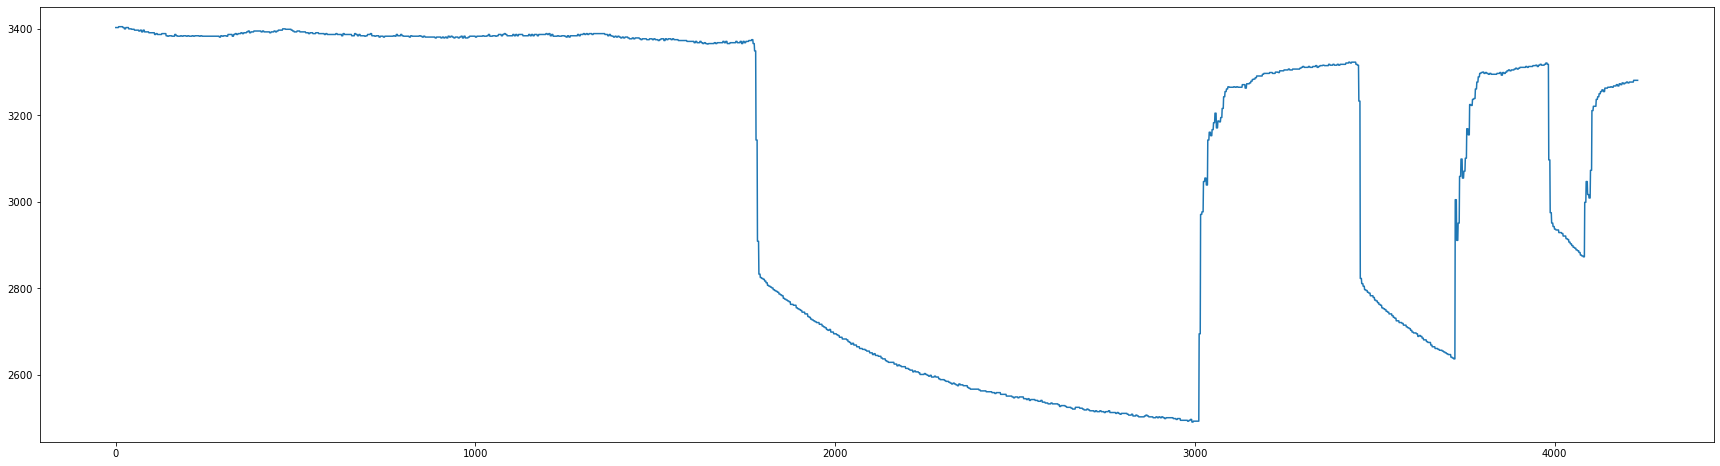

In [5]:
wrist_temp_4hz_df['w_temp'].plot(figsize=(30,8))

In [6]:
# Transform the on_wrist signal from 1Hz to 4Hz
on_wrist_4hz_array = pd.DataFrame(0, index=np.arange(len(wrist_temp_4hz_df)), columns=['on_wrist'])
for index, value in on_wrist_4hz_array['on_wrist'].items():
    on_wrist_4hz_array['on_wrist'][index] = on_wrist_1hz_df['on_wrist'][int(index/4)]

In [7]:
on_wrist_4hz_array.describe()

,on_wrist
count,4232.000000
mean,0.645558
std,0.478401
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
temp_df = pd.concat([on_wrist_4hz_array['on_wrist'], wrist_temp_4hz_df['w_temp']])

In [9]:
data = {"on_wrist": on_wrist_4hz_array['on_wrist'],
        "w_temp": wrist_temp_4hz_df['w_temp']}

In [10]:
df = pd.concat(data,
               axis = 1)

In [11]:
df['wrist_temperature'] = df.apply(lambda row: row.on_wrist * row.w_temp, axis=1)

<AxesSubplot:>

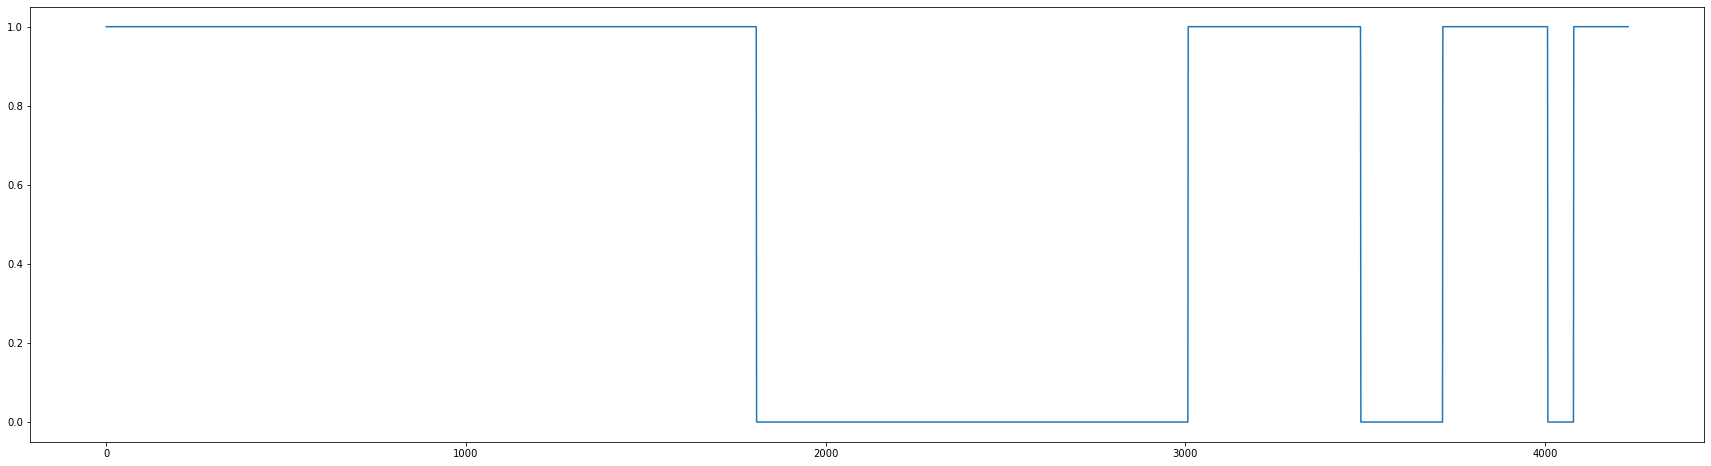

In [12]:
df['on_wrist'].plot(figsize=(30,8))

<AxesSubplot:>

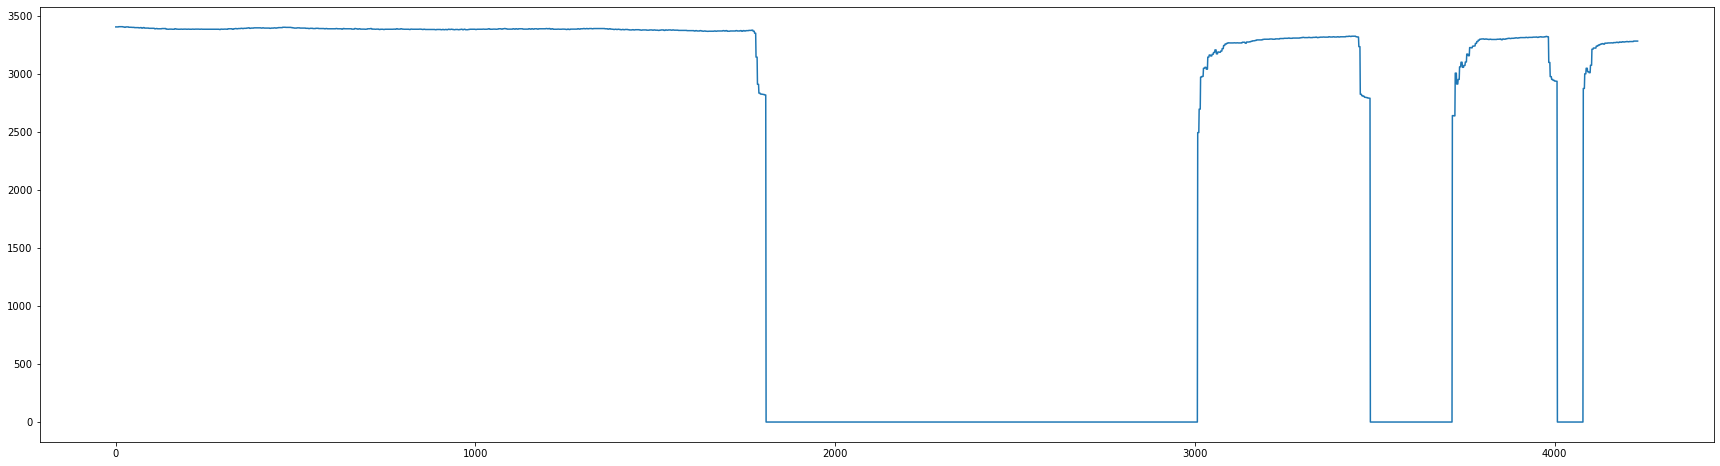

In [13]:
df['wrist_temperature'].plot(figsize=(30,8))

In [14]:
df = df.drop(df[df.wrist_temperature == 0].index)

<AxesSubplot:>

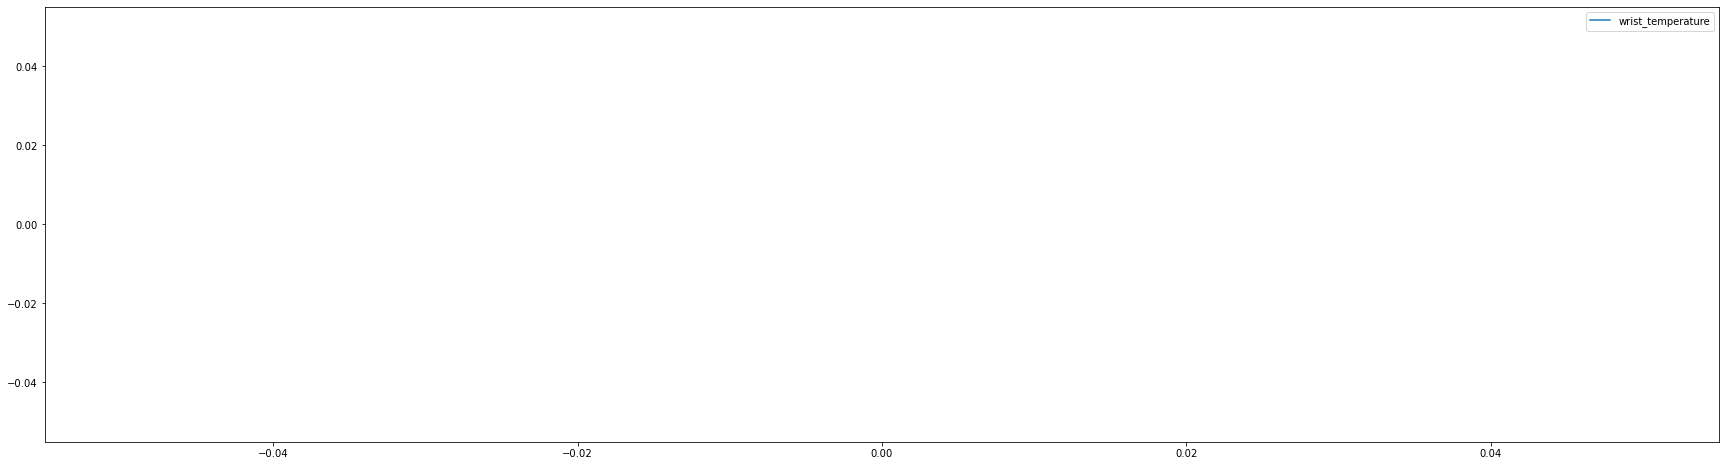

In [15]:
df[['wrist_temperature']].plot(figsize=(30,8))

In [16]:
WINDOW=1200
df.index = range(len(df))
df['roll_avg'] = df.iloc[:,2].rolling(window=WINDOW).mean()
df['roll_std']  = df.iloc[:,2].rolling(window=WINDOW).std()
df['upper_band'] = df.apply(lambda row: row.roll_avg + 3 * row.roll_std, axis=1)
df['lower_band'] = df.apply(lambda row: row.roll_avg - 3 * row.roll_std, axis=1)

<AxesSubplot:>

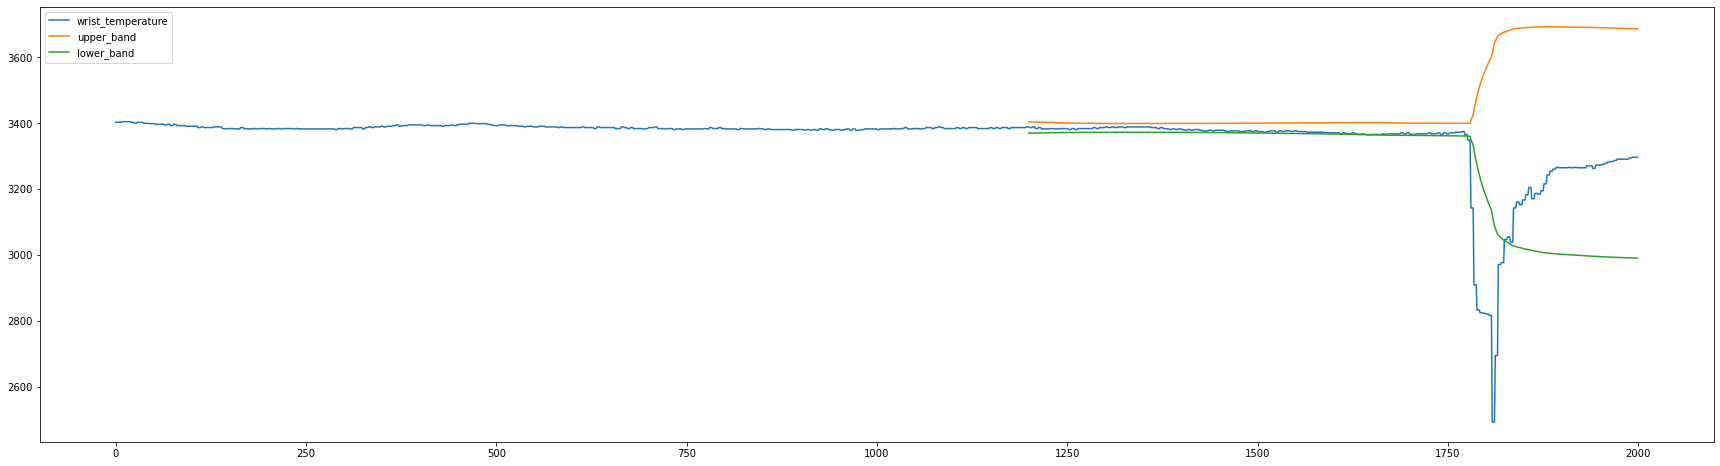

In [25]:
df[['wrist_temperature','upper_band','lower_band']][:2000].plot(figsize=(30,8))

In [18]:
df['discostamento_pos'] = df.apply(lambda row: row.wrist_temperature - row.upper_band if row.wrist_temperature > row.upper_band else None, axis=1)
df['discostamento_neg'] = df.apply(lambda row: row.lower_band - row.wrist_temperature if row.wrist_temperature < row.lower_band else None, axis=1)
df['discostamento'] = df.discostamento_pos.combine_first(df.discostamento_neg)

In [19]:
outs = df[(df.discostamento > 0)]

In [20]:
outs['discostamento'].sum()/len(outs)

231.26409782317594

In [21]:
df[80000:120000].describe()

,on_wrist,w_temp,wrist_temperature,roll_avg,roll_std,upper_band,lower_band,discostamento_neg
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
if df['wrist_temperature'].mean() < 3200 or df['wrist_temperature'].mean() > 4300:
    print("ANOMALIA")